In [1]:
!pip install tf_notification_callback
!pip install livelossplot
# raw keras
from livelossplot import PlotLossesKeras
plotlosses = PlotLossesKeras()
from tf_notification_callback import TelegramCallback
telegram_callback = TelegramCallback('1349030414:AAGOY3VPrppCE43qVCLcBP7RbmlC2heV7gY',
                                     '-399009598',
                            f'Emotion Recoginition Model_19thOct2020',
                           ['loss', 'val_loss'],
                            ['accuracy', 'val_accuracy'],
                           getSummary=False)

callbacks = [telegram_callback,plotlosses]

     |████████████████████████████████| 404 kB 594 kB/s 
     |████████████████████████████████| 496 kB 2.5 MB/s 
     |████████████████████████████████| 58 kB 1.3 MB/s 
  Created wheel for tornado: filename=tornado-6.0.4-cp37-cp37m-linux_x86_64.whl size=428630 sha256=6bf54c751c84f163b143167d3037b9499fc4b844ea5ab27ae17917a068372c23
  Stored in directory: /root/.cache/pip/wheels/7d/14/fa/d88fb5da77d813ea0ffca38a2ab2a052874e9e1142bad0b348
Successfully built tornado
  Attempting uninstall: tornado
    Found existing installation: tornado 5.0.2
    Uninstalling tornado-5.0.2:
      Successfully uninstalled tornado-5.0.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

jupyterlab-git 0.10.0 requires nbdime<2.0.0,>=1.1.0, but you'll have nbdime 2.0.0

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
import csv
from PIL import Image    
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tqdm import tqdm
import numpy as np # linear algebra
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
import collections
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# from tensorflow.keras.utils import plot_model
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        print(os.listdir("../input"))
        

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv
['challenges-in-representation-learning-facial-expression-recognition-challenge']
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv
['challenges-in-representation-learning-facial-expression-recognition-challenge']
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz
['challenges-in-representation-learning-facial-expression-recognition-challenge']
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv
['challenges-in-representation-learning-facial-expression-recognition-challenge']
/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/example_submission.csv
['challenges-in-representation-learning-facial-expression-recognition-challenge']


In [3]:
data_set = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')
examples = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/test.csv')
icml_face_data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv')

In [4]:
ax = np.array(data_set.emotion)
collections.Counter(ax)

Counter({0: 3995, 2: 4097, 4: 4830, 6: 4965, 3: 7215, 5: 3171, 1: 436})

In [5]:
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample((data_set.pixels).values.reshape(-1, 1), data_set.emotion)


a = np.array(y_over)
collections.Counter(a)






Counter({0: 7215, 2: 7215, 4: 7215, 6: 7215, 3: 7215, 5: 7215, 1: 7215})

In [6]:

y_over = pd.Series(y_over)
y_over= y_over.values.reshape(len(y_over),1)

X_train,X_test,Y_train,Y_test = train_test_split(X_over,y_over, test_size=0.2)
#print(X_train[11])
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


X_train shape: (40404, 1)
Y_train shape: (40404, 1)
X_test shape: (10101, 1)
Y_test shape: (10101, 1)


In [7]:
def preprocessing(pixels):
    a = []
    
    for i in range(len(pixels)):
            image_string = (pixels)[i].split(' ') 
            image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48,1)
            a.append(image_data)

    return a

In [8]:
%matplotlib inline
a= []

X_train = pd.Series(X_train.flatten())
X_train_resnet50 =X_train
a = preprocessing(X_train)



X_train = np.array(a)
#X_test =test
# Y_train = y_over

print ("number of training examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))



number of training examples = 40404
X_train shape: (40404, 48, 48, 1)
Y_train shape: (40404, 1)


In [9]:
# ResNet50
a = []
for i in range(len(X_train_resnet50)):
            image_string = (X_train_resnet50)[i].split(' ') 
            image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
            a.append(image_data)

X_train_resnet50 = np.array(a)
rgb_X_train = np.repeat(X_train_resnet50[..., np.newaxis], 3, -1)
print(rgb_X_train.shape)  # (size, 48, 48, 3)

model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

x = model1.output
x= Flatten()(x)
x = Dense(7, activation='softmax')(x)
model50 = Model(inputs=model1.input, outputs=x)


model50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model50.fit(rgb_X_train, Y_train, batch_size=64, epochs=40, steps_per_epoch=len(X_train)/128, validation_split = 0.25,callbacks=callback)
model50.save('CNNmodel')


(40404, 48, 48, 3)
94773248/94765736 [==============================] - 1s 0us/step


NameError: name 'callback' is not defined

X_test shape: (10101, 1)
(10101, 48, 48)
316/316 [==============================] - 4s 13ms/step - loss: 2.0062 - accuracy: 0.1263
Surprise


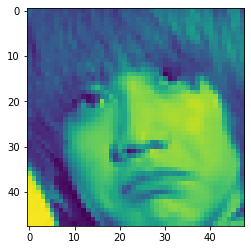

In [10]:
Expressions = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
a= []
print ("X_test shape: " + str(X_test.shape))
X_test50 = pd.Series(X_test.flatten())
a = []
for i in range(len(X_test50)):
            image_string = (X_test50)[i].split(' ') 
            image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
            a.append(image_data)


X_testing_array = np.array(a)
print(X_testing_array.shape)  # (size, 48, 48)
rgb_X_test = np.repeat(X_testing_array[..., np.newaxis], 3, -1)
# print(rgb_X_test.shape)  # (size, 48, 48, 3)

prediction = model50.predict(rgb_X_test)
model50.evaluate(rgb_X_test,Y_test)
    
results = Expressions[np.argmax(prediction[100])]
print(results)

image_string = X_test50[100].split(' ') 
image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
plt.imshow(image_data)

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(64, (1, 1), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(layers.Conv2D(256, (5, 5),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.25))


model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(layers.Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))
model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# model.fit(X_train, Y_train, batch_size=64, epochs=40, steps_per_epoch=(len(X_train)/128))




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        128       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 256)       8

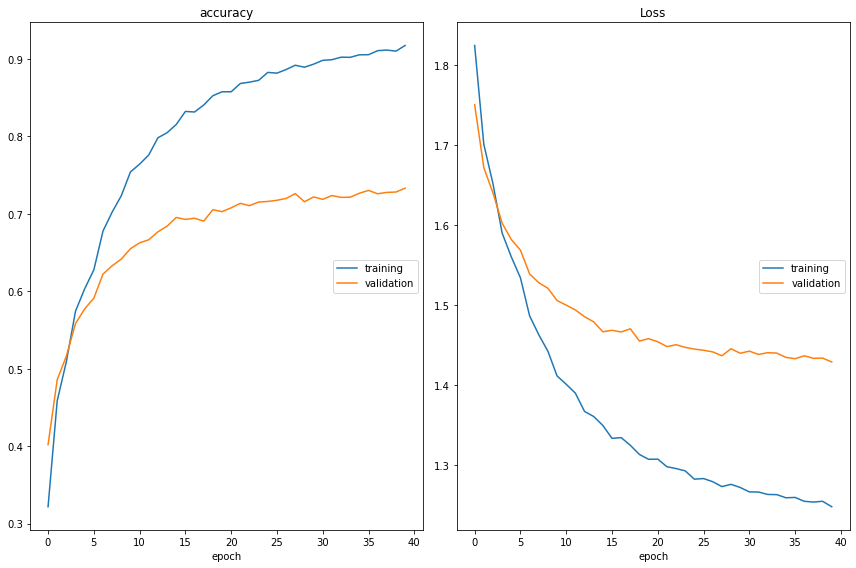

accuracy
	training         	 (min:    0.322, max:    0.917, cur:    0.917)
	validation       	 (min:    0.402, max:    0.733, cur:    0.733)
Loss
	training         	 (min:    1.248, max:    1.824, cur:    1.248)
	validation       	 (min:    1.429, max:    1.750, cur:    1.429)
316/315 [==============================] - 17s 54ms/step - loss: 1.2484 - accuracy: 0.9175 - val_loss: 1.4292 - val_accuracy: 0.7332


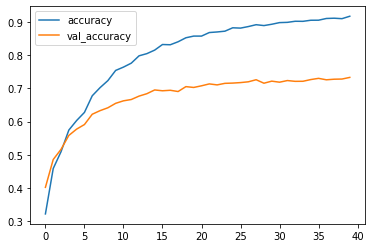

In [12]:



model.fit(X_train, Y_train, batch_size=64, epochs=40, steps_per_epoch=len(X_train)/128, validation_split = 0.25,callbacks=callbacks)

model.save('CNNmodel')

X_test shape: (10101, 1)
number of Test examples = 10101
X_test shape: (10101, 48, 48, 1)
Y_test shape: (10101, 1)
316/316 [==============================] - 3s 8ms/step - loss: 1.4214 - accuracy: 0.7400
Neutral


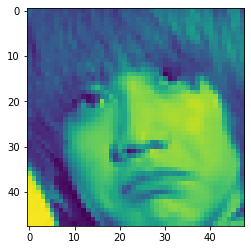

In [13]:
Expressions = ["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]
a= []
print ("X_test shape: " + str(X_test.shape))
X_test = pd.Series(X_test.flatten())

a = preprocessing(X_test)
X_testing_array = np.array(a)


print ("number of Test examples = " + str(X_testing_array.shape[0]))
print ("X_test shape: " + str(X_testing_array.shape))
print ("Y_test shape: " + str(Y_test.shape))

prediction = model.predict(X_testing_array)
model.evaluate(X_testing_array,Y_test)

results = Expressions[np.argmax(prediction[100])]
print(results)
image_string = X_test[100].split(' ') 
image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48)
plt.imshow(image_data)